# Task 4.10 Part 1

## Table of Contents

#### 1. Import Data and Libraries
#### 2. Check for PII (Personally Identifiable Information )
#### 3. Create Region column
#### 4. Spending habit by Regions
#### 5. Create flags 
#### 6. Customer Profiles
#### 7. Department Mapping with df_filtered dataframe
#### 8. Analysis of First customer profile
#### 9. Analysis of second customer profile
#### 10. Analysis of Customer Profiles with level of frequency and expenditure
#### 11. Analysis of Customer Profiles with Regions
#### 12. Export Dataframe df_Final





# Import Data and Libraries

In [100]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [101]:
# Project folder path
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Python fundamental for Data Analysis\01-2024 Instacart Basket analysis'

In [102]:
path

'C:\\Users\\BhuwanDhakal\\Sunita\\Projects\\2 Data Immersion\\Python fundamental for Data Analysis\\01-2024 Instacart Basket analysis'

In [103]:
# Importing final_combined_Data Dataframe 
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_combined_data.pkl'))

In [104]:
df.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days_modified,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [105]:
df.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined',
       'Number_of_Dependants', 'Family_Status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'time_of_day',
       'days_since_prior_order', 'First_Order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days_modified', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency'],
      dtype='object')

# Check for PII (Personally Identifiable Information )

#### In Customer table there were a name and surname column which I already deleted while cleaning Data.

#  Create Region column

 #### I created a Excel file based on the https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States source.

In [106]:
df.shape

(32404859, 32)

In [107]:
# Import Region xlsx file 
Region = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'Regions of United States of America.xlsx'))

In [108]:
# Merge Region  and df using State as a key 
df_1 = df.merge(Region, on = ['State'])

In [109]:
df_1.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,busiest_day,busiest_days_modified,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency,Region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Regular days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [110]:
# Check the Result of Merged Dataframe
df_1.shape

(32404859, 33)

In [111]:
# value count by regions
df_1['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

# Spending habit by Regions

In [112]:
crosstab = pd.crosstab(df_1['Region'], df_1['spending_flag'], margins=True)

In [113]:
crosstab

spending_flag,High spender,Low spender,All
Region,,,
Midwest,155975,7441350,7597325
Northeast,108225,5614511,5722736
South,209691,10582194,10791885
West,160354,8132559,8292913
All,634245,31770614,32404859


In [114]:
# Copying the crosstab data to Excel
crosstab.to_clipboard()

#### The analysis in excel show that all regions have majority of low spenders. Midwest region have high spender compared to others but is very low compared to low spenders

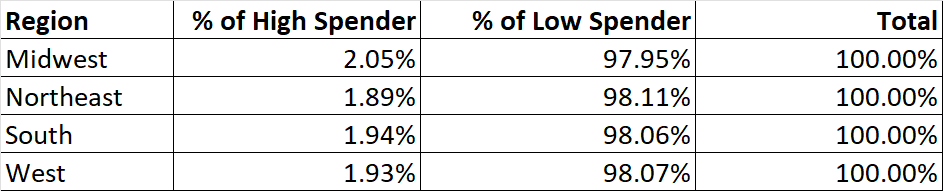

#### Comparing by region, South has more spenders in both high and low category followed by West, Midwest and Northeast. South has double amount of customers (34%) compared to Northeast (18%)

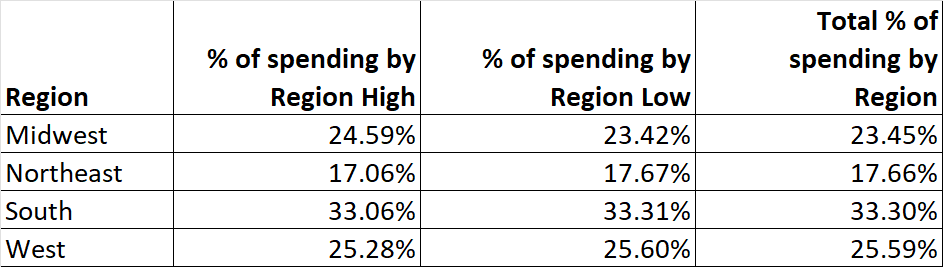

# Create Flag

## Create Exclusion flag for low_activity customers

In [115]:
# create the low activity flag
df_1.loc[df_1['max_order'] < 5, 'activity'] = 'low_activity_customer'

In [116]:
# Counting the value of low activity customer
df_1['activity'].value_counts()

low_activity_customer    1440295
Name: activity, dtype: int64

In [117]:
# Creating a new dataframe 'df_filtered' and excluding low_activity_customers.
df_filtered = df_1[df_1['activity'] != 'low_activity_customer']

In [118]:
df_filtered.shape

(30964564, 34)

In [119]:
# Counting the vlaue of activity column
df_filtered['activity'].value_counts(dropna=False)

NaN    30964564
Name: activity, dtype: int64

In [120]:
# Exporting new Dataframe df_filtered excluding low_activity_customer
df_filtered.to_pickle(os.path.join(path, '02 Data\Prepared Data\df_filtered.pkl'))

## Create Flag based on Age

In [121]:
df_filtered.loc[df_filtered['Age'] <= 18, 'Age_Category'] = 'Adolescent'

C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_22048\842969012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered['Age'] <= 18, 'Age_Category'] = 'Adolescent'


In [122]:
df_filtered.loc[(df_filtered['Age'] > 18) & (df_filtered['Age'] <= 35), 'Age_Category'] = 'Young Adult'

In [123]:
df_filtered.loc[(df_filtered['Age'] > 35) & (df_filtered['Age'] <= 65), 'Age_Category'] = 'Adult'

In [124]:
df_filtered.loc[df_filtered['Age'] > 65, 'Age_Category'] = 'Old Age'

In [125]:
df_filtered['Age_Category'].value_counts(dropna=False)

Adult          14494925
Young Adult     8260348
Old Age         7730834
Adolescent       478457
Name: Age_Category, dtype: int64

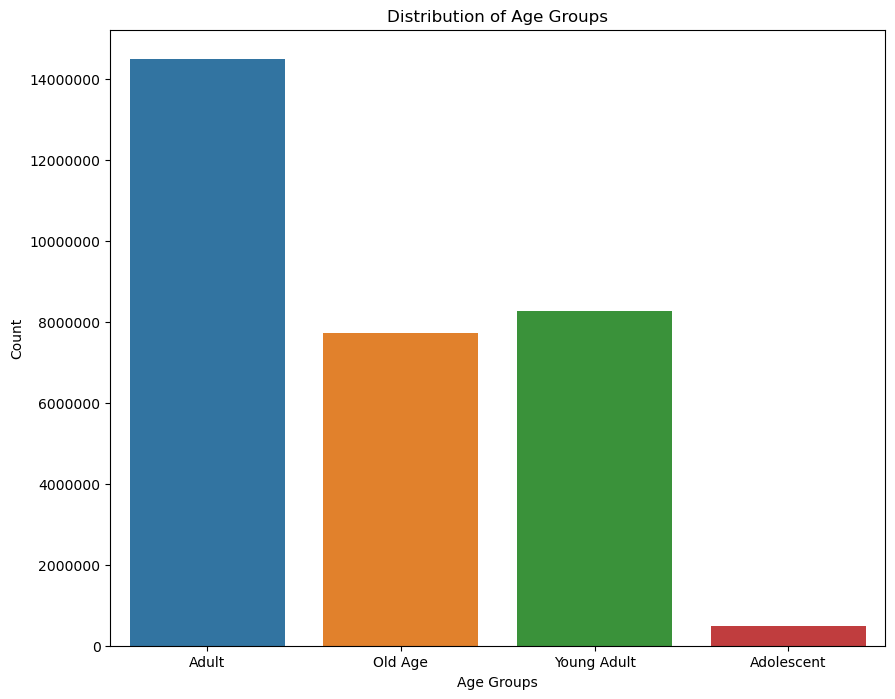

In [126]:
# Display the counts above in a bar chart
# Bar charts that show Age Group distributions by Age

plt.figure(figsize = (10, 8))
barplot1 = sns.countplot(data = df_filtered, x = 'Age_Category')

plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [127]:
# Export the bar chart Distribution of Age Groups

barplot1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Distribution of Age Groups.png'))

## Create flag based on income

In [128]:
df_filtered.loc[(df_filtered['income'] <= 50000), 'Income_Category'] ='Low Income'

C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_22048\263595351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[(df_filtered['income'] <= 50000), 'Income_Category'] ='Low Income'


In [129]:
df_filtered.loc[(df_filtered['income'] > 50000) &  (df_filtered['income'] <=100000), 'Income_Category'] ='Medium Income'

In [130]:
df_filtered.loc[(df_filtered['income'] > 100000), 'Income_Category'] = 'High Income'

In [131]:
df_filtered['Income_Category'].value_counts(dropna=False)

High Income      14207028
Medium Income    13394982
Low Income        3362554
Name: Income_Category, dtype: int64

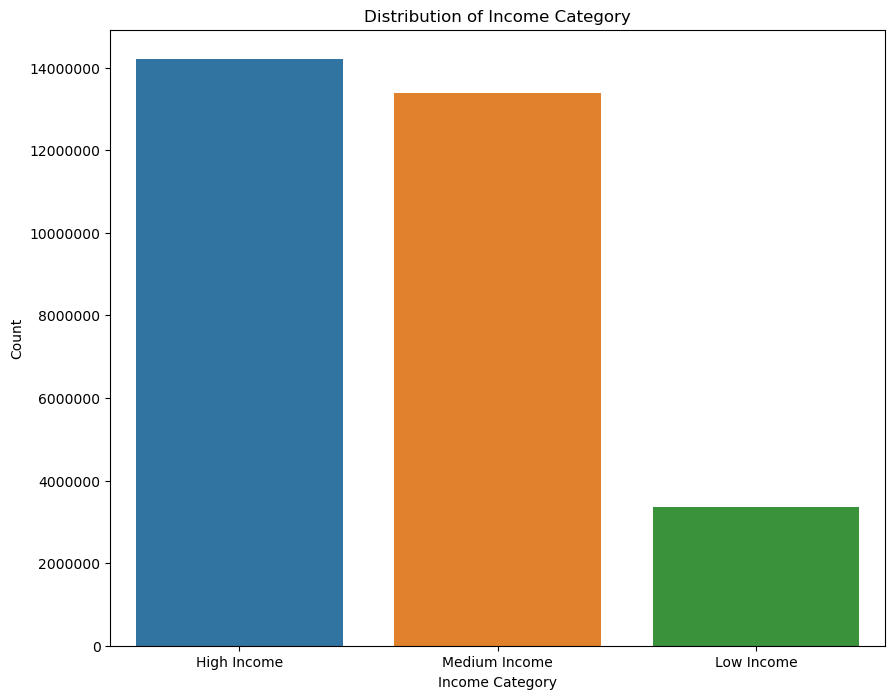

In [132]:
# Display the counts above in a bar chart
# Bar charts that show Income_Categoty distributions by income

plt.figure(figsize = (10, 8))
barplot2 = sns.countplot(data = df_filtered, x = 'Income_Category')

plt.title('Distribution of Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [133]:
# Export the bar chart Distribution of Income Categoey

barplot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Distribution of Income Category.png'))

## Create flag based on Dependants

In [134]:
df_filtered.loc[df_filtered['Number_of_Dependants'] == 0, 'Dependants_Category'] = "No Dependants"

C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_22048\1061138737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered['Number_of_Dependants'] == 0, 'Dependants_Category'] = "No Dependants"


In [135]:
df_filtered.loc[(df_filtered['Number_of_Dependants'] >= 1) &  (df_filtered['Number_of_Dependants'] <=2), 'Dependants_Category'] ='2 or Less Dependents'

In [136]:
df_filtered.loc[df_filtered['Number_of_Dependants'] >= 3, 'Dependants_Category'] = "3 or More Dependants"

In [137]:
df_filtered['Dependants_Category'].value_counts(dropna=False)

2 or Less Dependents    15452367
3 or More Dependants     7772516
No Dependants            7739681
Name: Dependants_Category, dtype: int64

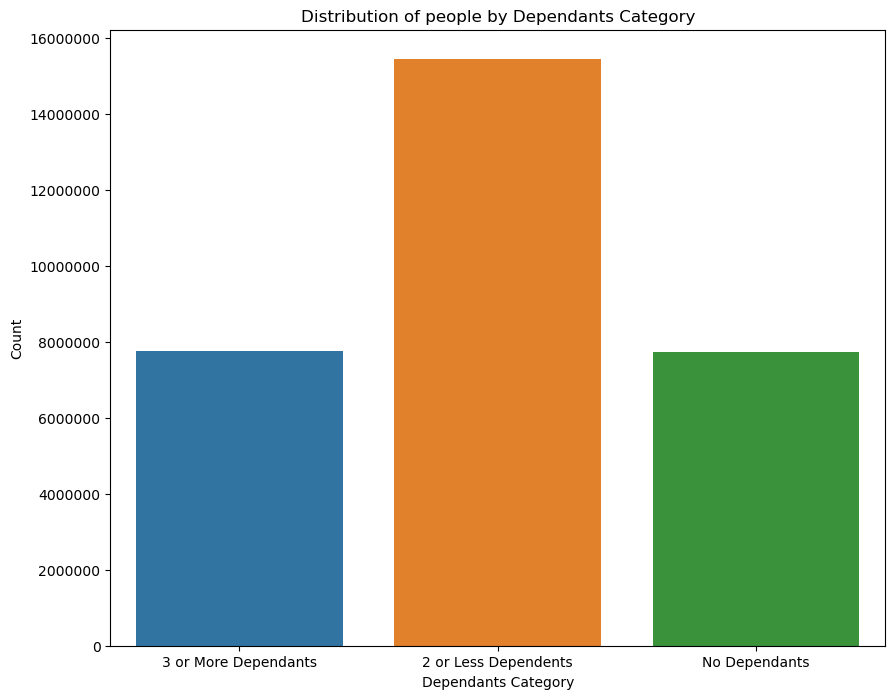

In [138]:
# Display the counts above in a bar chart
# Bar charts that show Dependants Category  distributions by number of Dependents

plt.figure(figsize = (10, 8))
barplot3 = sns.countplot(data = df_filtered, x = 'Dependants_Category')

plt.title('Distribution of people by Dependants Category')
plt.xlabel('Dependants Category')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [139]:
# Export the bar chart Distribution of Dependants Category

barplot3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Distribution of Dependants Category.png'))

# Customer Profiles

## First Customer profile based on Age and Number of Dependents Category

#### I am going to create two customer profiles to review what items are purchased by such profiles. My first profile is based on Age and number of dependents to see if combination of these affect the products purchased by the customers

In [140]:
from itertools import product

In [141]:
age_categories = df_filtered['Age_Category'].unique() # Getting all values of age Categories

In [142]:
dep_categories = df_filtered['Dependants_Category'].unique() # Getting all values of Number of Dependents categories

In [143]:
combine_age_dep = product(age_categories, dep_categories) # Combination of age and number of Dependents Categories

In [144]:
# Create 'customer_profile' column
df_filtered['customer_profile'] = ''

for combination in combine_age_dep:
    age, dep = combination
    filter_condition = (df_filtered['Age_Category'] == age) & \
                       (df_filtered['Dependants_Category'] == dep)
    df_filtered.loc[filter_condition, 'customer_profile'] = f'{[age]}_{[dep]}'


C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_22048\238370872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['customer_profile'] = ''


In [145]:
# values counts of each category
df_filtered['customer_profile'].value_counts()

['Adult']_['2 or Less Dependents']          7201406
['Young Adult']_['2 or Less Dependents']    4133712
['Old Age']_['2 or Less Dependents']        3883335
['Adult']_['No Dependants']                 3656270
['Adult']_['3 or More Dependants']          3637249
['Young Adult']_['3 or More Dependants']    2068201
['Young Adult']_['No Dependants']           2058435
['Old Age']_['3 or More Dependants']        1941778
['Old Age']_['No Dependants']               1905721
['Adolescent']_['2 or Less Dependents']      233914
['Adolescent']_['3 or More Dependants']      125288
['Adolescent']_['No Dependants']             119255
Name: customer_profile, dtype: int64

#### Based on this analysis, instacart has must customers who are adults and having either 1 or 2 dependents. Adolescent group represent the least number of instacarts customers

## Second Customer profile based on  income and Family_Status

In [146]:
income_categories = df_filtered['Income_Category'].unique() # Getting all values of Income Categories

In [147]:
family_categories = df_filtered['Family_Status'].unique() # Getting all values of Family Status

In [148]:
combine_income_family = product(income_categories, family_categories) # Combination of income and Family Status Categories

In [149]:
# Create 'customer_profile1' column
df_filtered['customer_profile1'] = ''

for combination in combine_income_family:
    income,family = combination
    filter_condition = (df_filtered['Income_Category'] == income) & \
                       (df_filtered['Family_Status'] == family)
    df_filtered.loc[filter_condition, 'customer_profile1'] = f'{[income]}_{[family]}'


C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_22048\2923674958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['customer_profile1'] = ''


In [150]:
df_filtered['customer_profile1'].value_counts()

['High Income']_['married']                               10590524
['Medium Income']_['married']                              8858095
['Medium Income']_['single']                               2735446
['Low Income']_['married']                                 2295092
['High Income']_['divorced/widowed']                       1846202
['High Income']_['single']                                 1722754
['Medium Income']_['living with parents and siblings']     1213082
['Low Income']_['single']                                   636210
['Medium Income']_['divorced/widowed']                      588359
['Low Income']_['living with parents and siblings']         220542
['Low Income']_['divorced/widowed']                         210710
['High Income']_['living with parents and siblings']         47548
Name: customer_profile1, dtype: int64

Based on the second customer profile, high income married family represent the most number of customers

## Department Mapping with df_filtered dataframe

In [151]:
# Import the Data from departments_wrangled.csv
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [152]:
df_dep.head()

,department
0,frozen
1,other
2,bakery
3,produce
4,alcohol


In [153]:
# Map department id to department names

department_mapping = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

# Create a new column "department" based on the mapping

df_filtered['department'] = df_filtered['department_id'].map(department_mapping)

C:\Users\BhuwanDhakal\AppData\Local\Temp\ipykernel_22048\629074761.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['department'] = df_filtered['department_id'].map(department_mapping)


In [154]:
df_filtered.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,median_days_between_orders,order_frequency,Region,activity,Age_Category,Income_Category,Dependants_Category,customer_profile,customer_profile1,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce


In [155]:
# Counting the value of department Column
df_filtered['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

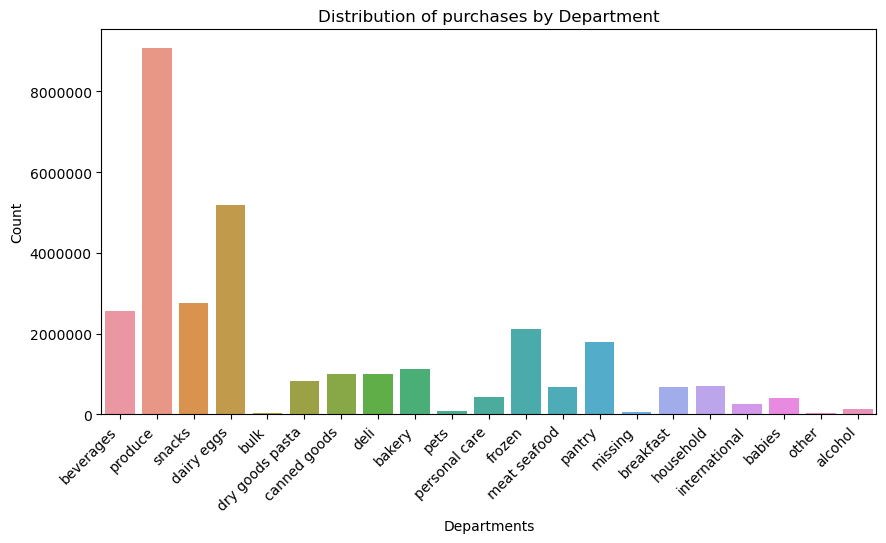

In [156]:
# Display the counts above in a bar chart
# Bar charts that show department and distribution of Purchases

plt.figure(figsize = (10, 5))
barplot4 = sns.countplot(data = df_filtered, x = 'department')

plt.title('Distribution of purchases by Department')
plt.xlabel('Departments')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [157]:
barplot4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Distribution of purchases by Department.png'))

In [158]:
#Filtering the produce department and creating a dataframe to understand who purchase the produce 
df_produce = df_filtered.loc[(df_filtered['department']=='produce')]

In [159]:
df_produce.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,median_days_between_orders,order_frequency,Region,activity,Age_Category,Income_Category,Dependants_Category,customer_profile,customer_profile1,department
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce


In [160]:
df_produce.shape

(9079273, 40)

# Analysis of First customer profile

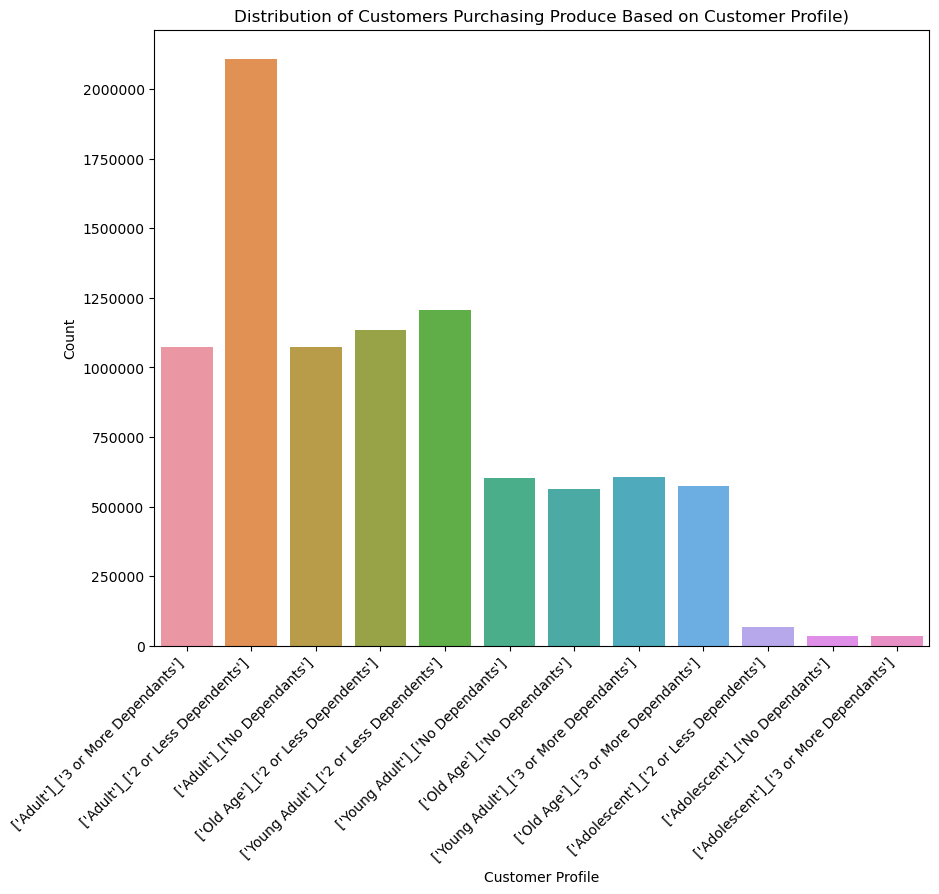

In [161]:
# Display the counts above in a bar chart
# Bar charts that show customer profile distributions by Purchasing Produce

plt.figure(figsize = (10, 8))
barplot5 = sns.countplot(data = df_produce, x = 'customer_profile')

plt.title('Distribution of Customers Purchasing Produce Based on Customer Profile)')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [162]:
# Export the bar chart Distribution of Customers purchasing Produce

barplot5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customers purchasing Produce (Customer Profile).png'))

#### Since we have most number of customers in Adult category with 2 or less dependents, the data shows that the produce is purchased mostly by that group

In [163]:
# observing the patter for second most purchased product
df_dairy_eggs = df_filtered.loc[(df_filtered['department']=='dairy eggs')]

In [164]:
df_dairy_eggs.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,median_days_between_orders,order_frequency,Region,activity,Age_Category,Income_Category,Dependants_Category,customer_profile,customer_profile1,department
11,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],dairy eggs
12,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],dairy eggs
13,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],dairy eggs
14,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],dairy eggs
15,26711,Female,Missouri,48,1/1/2017,3,married,165665,38928,0% Greek Strained Yogurt,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],dairy eggs


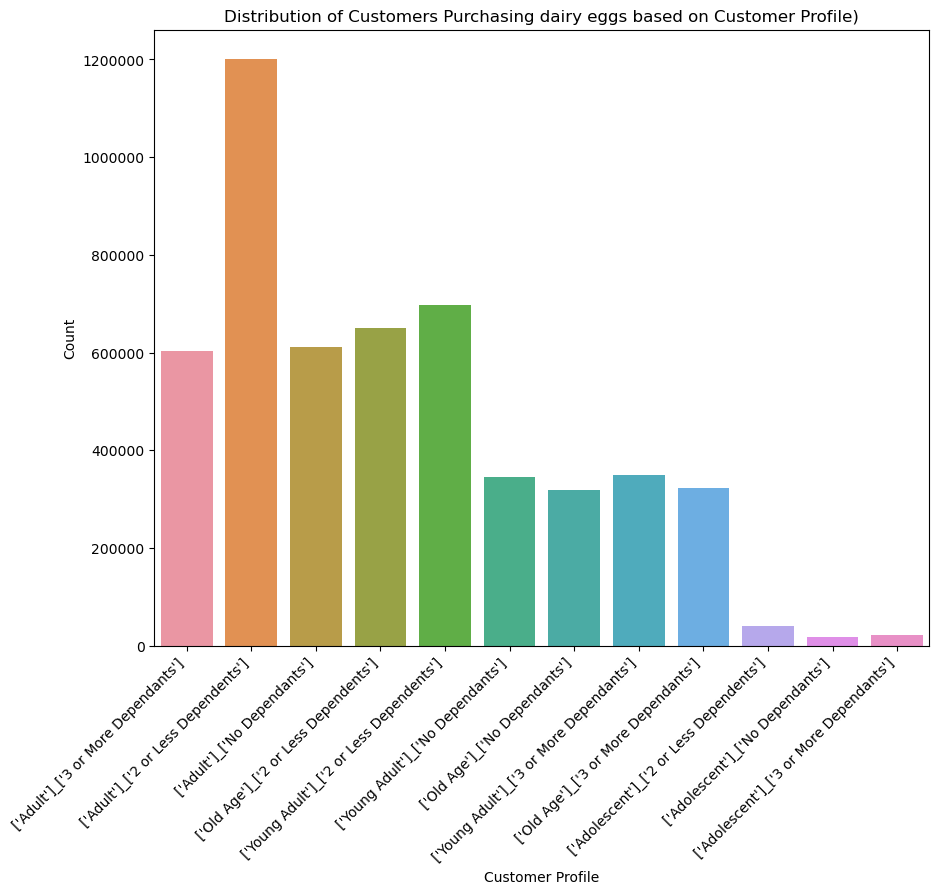

In [165]:
# Bar charts that show customer profile distributions by Purchasing dairy eggs

plt.figure(figsize = (10, 8))
barplot6 = sns.countplot(data = df_dairy_eggs, x = 'customer_profile')

plt.title('Distribution of Customers Purchasing dairy eggs based on Customer Profile)')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### The pattern is similar to the produce department

In [166]:
# Export the bar chart Distribution of Customers purchasing dairy eggs

barplot6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customers purchasing dairy eggs(Customer Profile).png'))

In [167]:
# Observing the third most purchased product
df_snacks = df_filtered.loc[(df_filtered['department']=='snacks')]

In [168]:
df_snacks.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,median_days_between_orders,order_frequency,Region,activity,Age_Category,Income_Category,Dependants_Category,customer_profile,customer_profile1,department
10,26711,Female,Missouri,48,1/1/2017,3,married,165665,8617,Assorted Nuggets,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],snacks
32,172673,Female,Missouri,40,1/1/2017,1,married,82200,5684,Gluten Free Multi Seed Rice Thin Crackers,...,29.0,Non-frequent customer,Midwest,NaN,Adult,Medium Income,2 or Less Dependents,['Adult']_['2 or Less Dependents'],['Medium Income']_['married'],snacks
38,172673,Female,Missouri,40,1/1/2017,1,married,82200,8555,Sweet Potato Tortilla Chips,...,29.0,Non-frequent customer,Midwest,NaN,Adult,Medium Income,2 or Less Dependents,['Adult']_['2 or Less Dependents'],['Medium Income']_['married'],snacks
48,172673,Female,Missouri,40,1/1/2017,1,married,82200,14633,Veggie Chips,...,29.0,Non-frequent customer,Midwest,NaN,Adult,Medium Income,2 or Less Dependents,['Adult']_['2 or Less Dependents'],['Medium Income']_['married'],snacks
57,172673,Female,Missouri,40,1/1/2017,1,married,82200,19006,Dark Chocolate Pretzels with Sea Salt,...,29.0,Non-frequent customer,Midwest,NaN,Adult,Medium Income,2 or Less Dependents,['Adult']_['2 or Less Dependents'],['Medium Income']_['married'],snacks


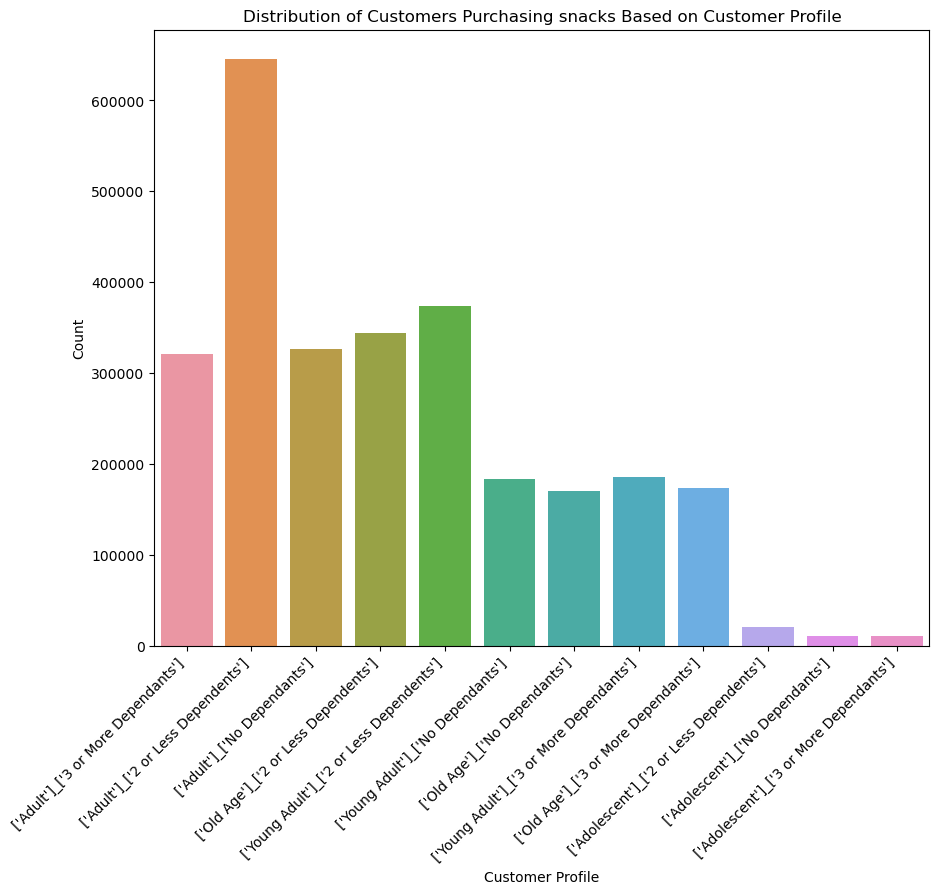

In [169]:
# Bar charts that show customer profile distributions by Purchasing Snacks

plt.figure(figsize = (10, 8))
barplot7 = sns.countplot(data = df_snacks, x = 'customer_profile')

plt.title('Distribution of Customers Purchasing snacks Based on Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### The patter of purchase is similar to the top 2 products purchased

In [170]:
# Export the bar chart Distribution of Customers purchasing snacks

barplot7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customers purchasing snacks (Customer Profile).png'))

### In order to analyze for all the products we will creat a pivot table and export to the Excel for further analysis

In [171]:
crosstab1 = df_filtered.pivot_table(values = 'user_id', index=['customer_profile'], columns='department', aggfunc=len)

In [172]:
crosstab1.to_clipboard()

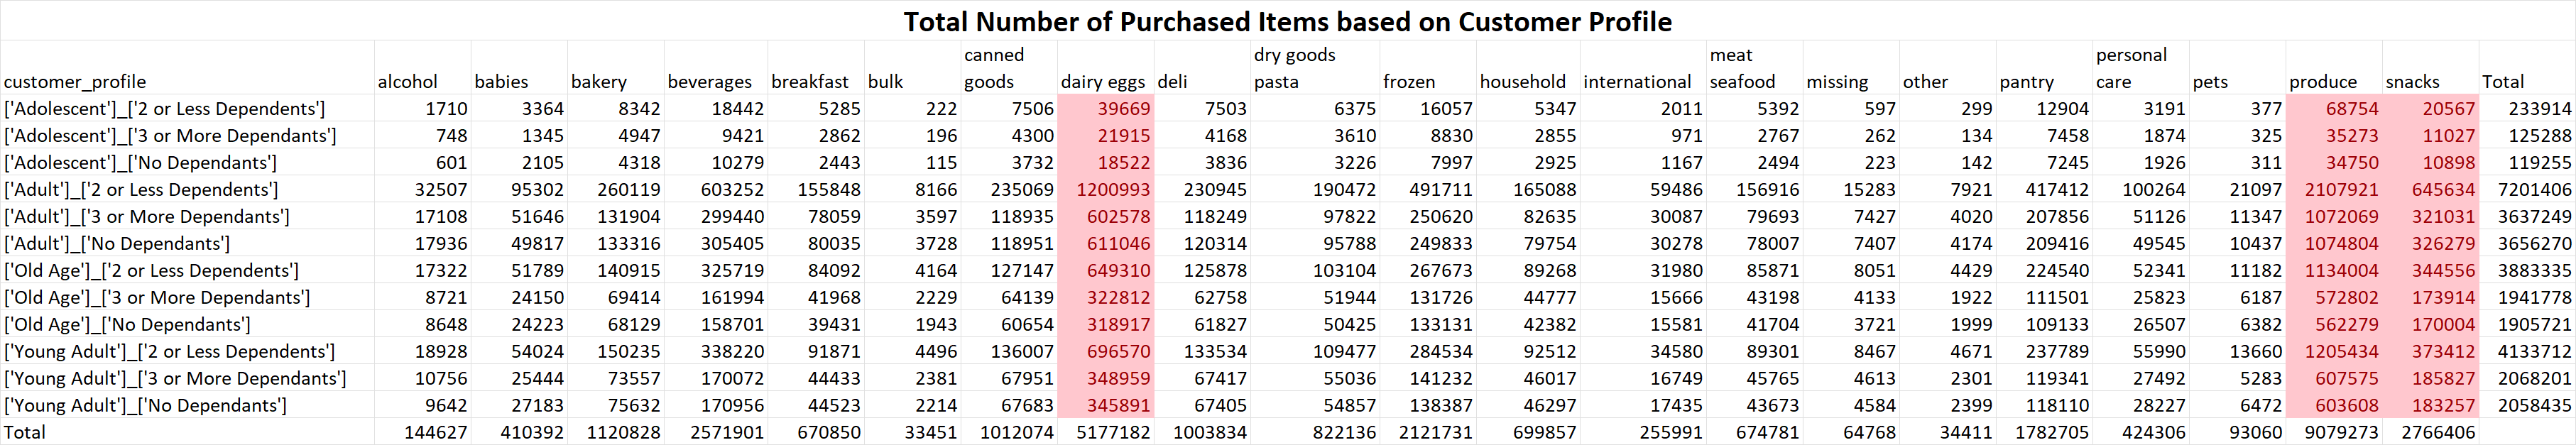

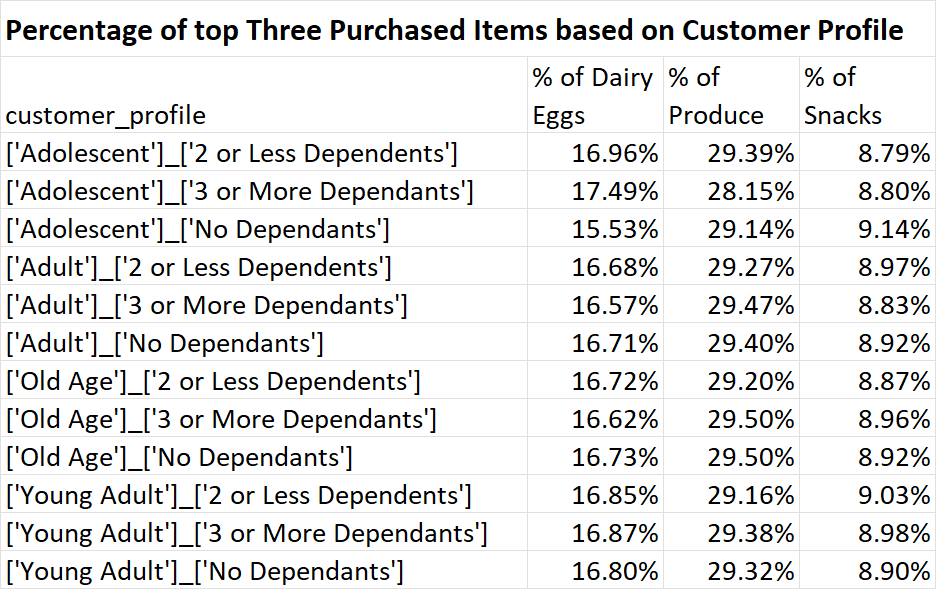

#### Based on the analysis for all the products, we see that all three products are the top products is similar for all profile. Produce is purchased by about 30% of the customers followed by Dairy and Eggs (about 17%) and Snacks (about 9%).   

# Analysis of second customer profile

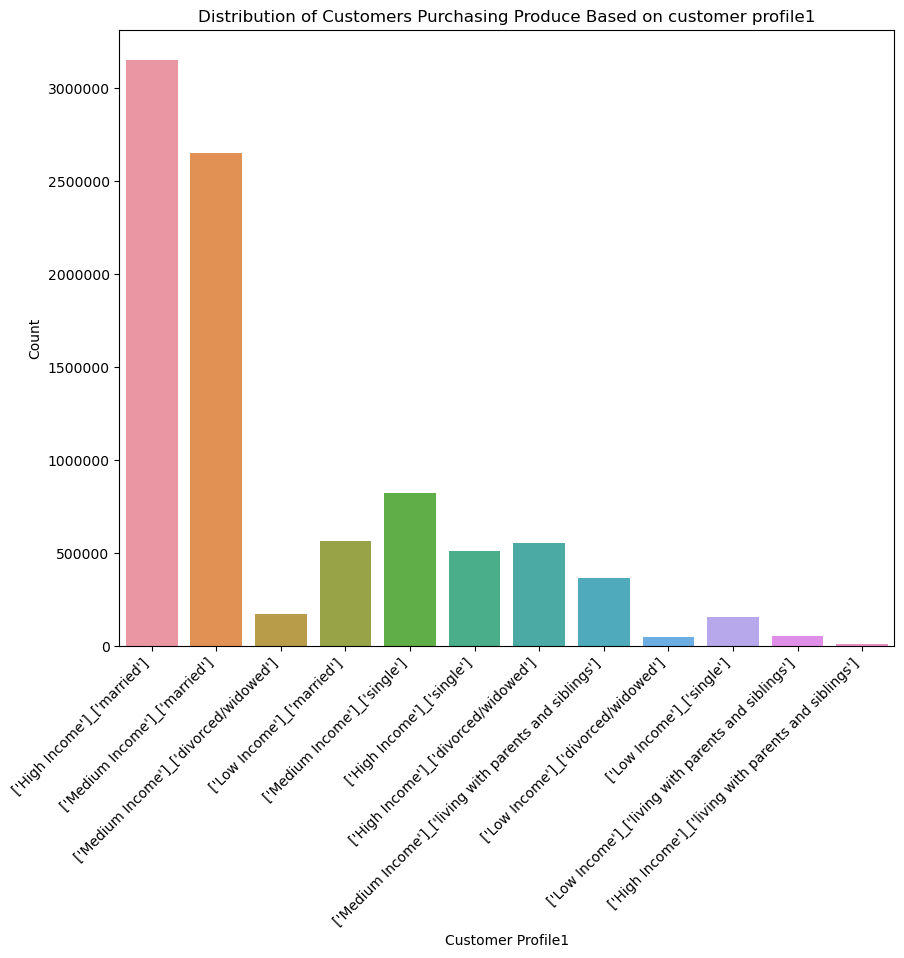

In [173]:
# Bar charts that show customer profile1 distributions by Purchasing Produce

plt.figure(figsize = (10, 8))
barplot8 = sns.countplot(data = df_produce, x = 'customer_profile1')

plt.title('Distribution of Customers Purchasing Produce Based on customer profile1')
plt.xlabel('Customer Profile1')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [174]:
# Export the bar chart Distribution of Customers purchasing Produce

barplot8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customers purchasing Produce (Customer Profile1).png'))

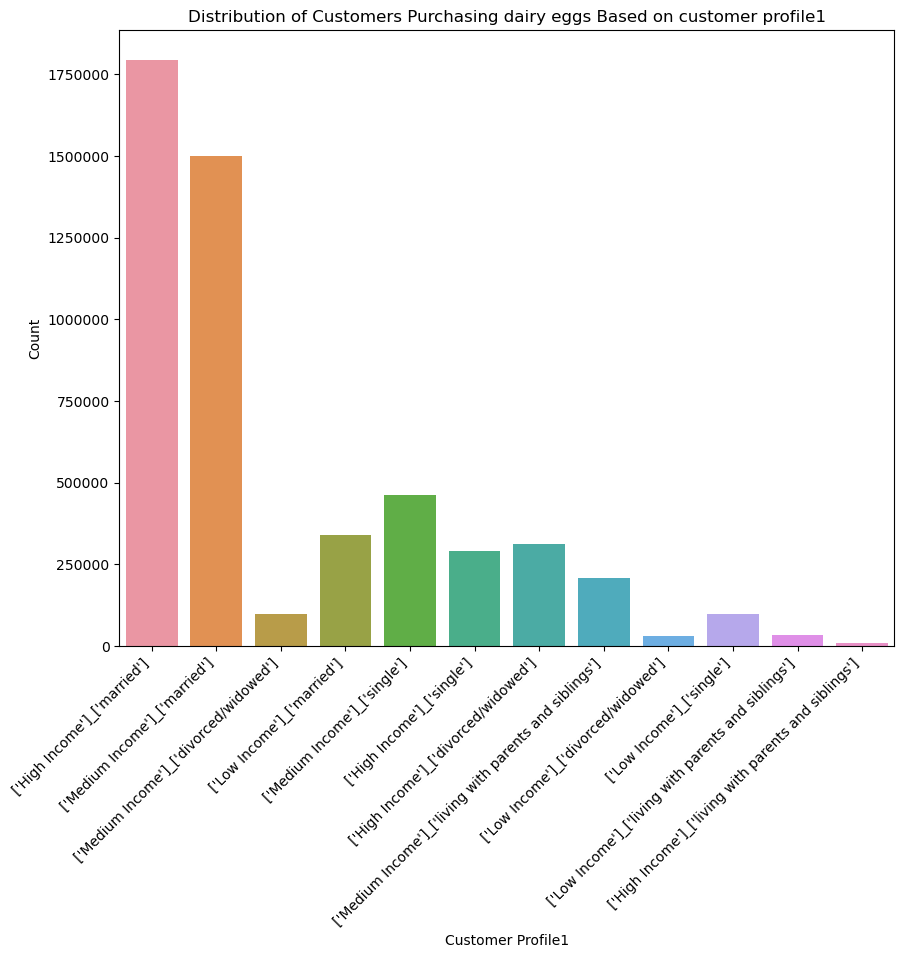

In [175]:
# Bar charts that show customer profile1 distributions by Purchasing Produce

plt.figure(figsize = (10, 8))
barplot9 = sns.countplot(data = df_dairy_eggs, x = 'customer_profile1')

plt.title('Distribution of Customers Purchasing dairy eggs Based on customer profile1')
plt.xlabel('Customer Profile1')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [176]:
# Export the bar chart Distribution of Customers purchasing dairy eggs

barplot9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customers purchasing dairy eggs (Customer Profile1).png'))

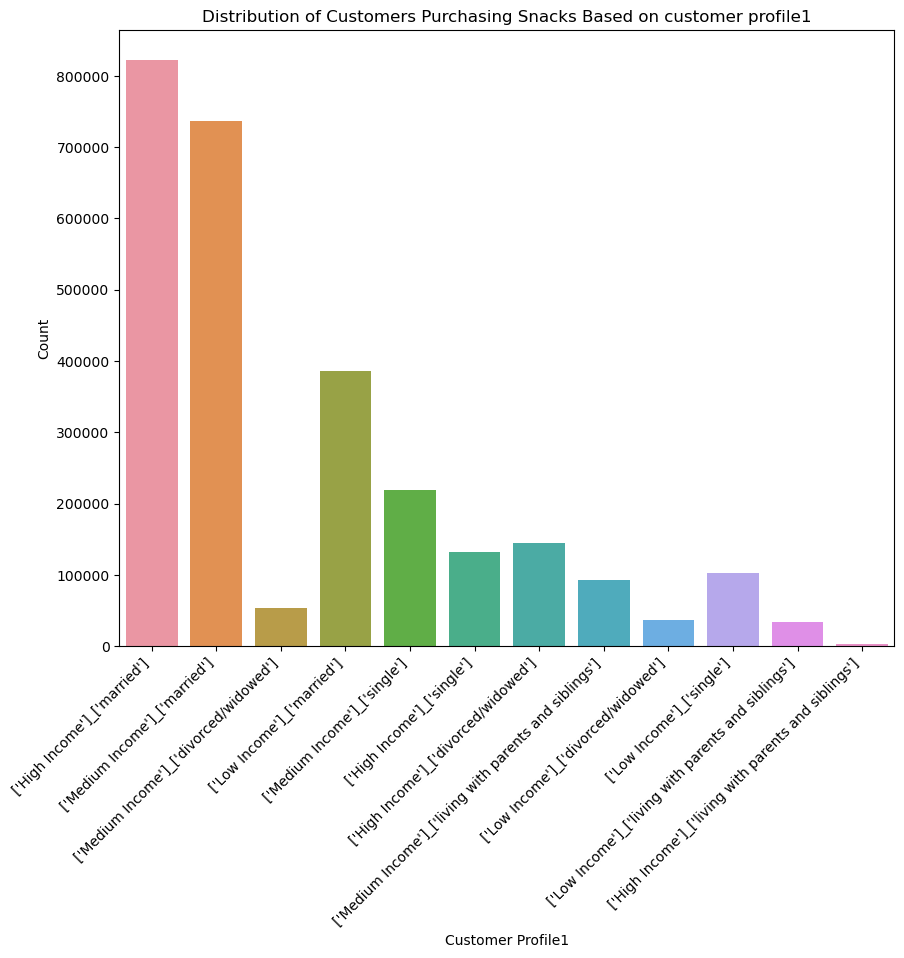

In [177]:
# Bar charts that show customer profile1 distributions by Purchasing Snacks

plt.figure(figsize = (10, 8))
barplot10 = sns.countplot(data = df_snacks, x = 'customer_profile1')

plt.title('Distribution of Customers Purchasing Snacks Based on customer profile1')
plt.xlabel('Customer Profile1')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [178]:
# Export the bar chart Distribution of Customers purchasing Snacks

barplot10.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customers purchasing Snacks (Customer Profile1).png'))

In [179]:
crosstab2 = df_filtered.pivot_table(values = 'user_id', index=['customer_profile1'], columns='department', aggfunc=len)

In [180]:
crosstab2.to_clipboard()

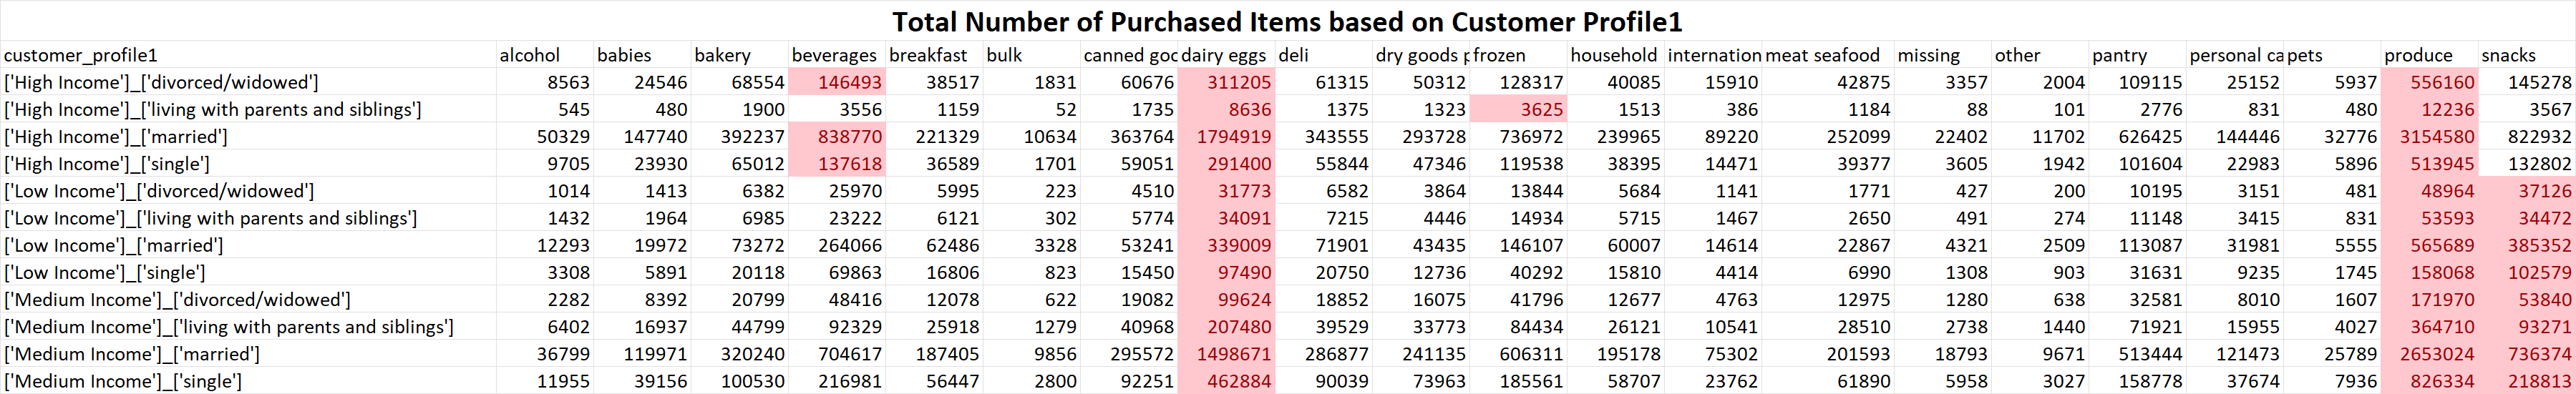

#### Based on above analysis, Produced is the most popular products followed by dairy and eggs. Beverage is one of the most popular product for high income group for divorced/widowed group, married and single people. High income customers who are living with parent and siblings have frozen food as their third most popular purchase 

# Analysis of Customer Profiles with level of frequency and expenditure

In [181]:
df_filtered.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined',
       'Number_of_Dependants', 'Family_Status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'orders_day_of_week', 'time_of_day',
       'days_since_prior_order', 'First_Order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days_modified', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency', 'Region', 'activity',
       'Age_Category', 'Income_Category', 'Dependants_Category',
       'customer_profile', 'customer_profile1', 'department'],
      dtype='object')

In [182]:
frequency_cp1=df_filtered.groupby('customer_profile').agg({'days_since_prior_order':['mean', 'min', 'max']})

In [183]:
frequency_cp1

days_since_prior_order           
                                                           mean  min   max
customer_profile                                                          
['Adolescent']_['2 or Less Dependents']               11.275747  0.0  30.0
['Adolescent']_['3 or More Dependants']               10.297872  0.0  30.0
['Adolescent']_['No Dependants']                      11.085618  0.0  30.0
['Adult']_['2 or Less Dependents']                    10.820341  0.0  30.0
['Adult']_['3 or More Dependants']                    10.855357  0.0  30.0
['Adult']_['No Dependants']                           10.732221  0.0  30.0
['Old Age']_['2 or Less Dependents']                  10.791890  0.0  30.0
['Old Age']_['3 or More Dependants']                  10.813042  0.0  30.0
['Old Age']_['No Dependants']                         10.785123  0.0  30.0
['Young Adult']_['2 or Less Dependents']              10.807007  0.0  30.0
['Young Adult']_['3 or More Dependants']              10.781925  0.0  30.0
['Young Adult']_['No Dependants']                     10.887434  0.0  30.0

#### Based on the profile, customers with  more dependents tend to order more frequently

In [184]:
frequency_cp2=df_filtered.groupby('customer_profile1').agg({'days_since_prior_order':['mean', 'min', 'max']})

In [185]:
frequency_cp2

days_since_prior_order  \
                                                                     mean   
customer_profile1                                                           
['High Income']_['divorced/widowed']                            10.702513   
['High Income']_['living with parents and sibli...              10.681014   
['High Income']_['married']                                     10.798492   
['High Income']_['single']                                      10.666962   
['Low Income']_['divorced/widowed']                             11.119502   
['Low Income']_['living with parents and siblin...              11.368721   
['Low Income']_['married']                                      11.180758   
['Low Income']_['single']                                       11.109778   
['Medium Income']_['divorced/widowed']                          10.768780   
['Medium Income']_['living with parents and sib...              10.642127   
['Medium Income']_['married']                                   10.754878   
['Medium Income']_['single']                                    10.837386   

                                                               
                                                    min   max  
customer_profile1                                              
['High Income']_['divorced/widowed']                0.0  30.0  
['High Income']_['living with parents and sibli...  0.0  30.0  
['High Income']_['married']                         0.0  30.0  
['High Income']_['single']                          0.0  30.0  
['Low Income']_['divorced/widowed']                 0.0  30.0  
['Low Income']_['living with parents and siblin...  0.0  30.0  
['Low Income']_['married']                          0.0  30.0  
['Low Income']_['single']                           0.0  30.0  
['Medium Income']_['divorced/widowed']              0.0  30.0  
['Medium Income']_['living with parents and sib...  0.0  30.0  
['Medium Income']_['married']                       0.0  30.0  
['Medium Income']_['single']                        0.0  30.0

#### Based on this profile, customers with high income tend to be ordering more frequently, followed by medium income

In [186]:
Expenditure_cp1=df_filtered.groupby('customer_profile').agg({'prices':['mean', 'min', 'max']})

In [187]:
Expenditure_cp1

prices              
                                               mean  min      max
customer_profile                                                 
['Adolescent']_['2 or Less Dependents']   10.120558  1.0  14900.0
['Adolescent']_['3 or More Dependants']   11.115115  1.0  99999.0
['Adolescent']_['No Dependants']          12.809670  1.0  99999.0
['Adult']_['2 or Less Dependents']        12.420556  1.0  99999.0
['Adult']_['3 or More Dependants']        10.731468  1.0  99999.0
['Adult']_['No Dependants']               12.032536  1.0  99999.0
['Old Age']_['2 or Less Dependents']      11.225234  1.0  99999.0
['Old Age']_['3 or More Dependants']      12.803955  1.0  99999.0
['Old Age']_['No Dependants']             12.062293  1.0  99999.0
['Young Adult']_['2 or Less Dependents']  11.803181  1.0  99999.0
['Young Adult']_['3 or More Dependants']  12.746548  1.0  99999.0
['Young Adult']_['No Dependants']         12.223618  1.0  99999.0

#### Based on this analysis mostly Adolescent with No Dependants people spend more followed by Old Age with three or more Dependants

In [188]:
Expenditure_cp2=df_filtered.groupby('customer_profile1').agg({'prices':['mean', 'min', 'max']})

In [189]:
Expenditure_cp2

prices              
                                                         mean  min      max
customer_profile1                                                          
['High Income']_['divorced/widowed']                13.091085  1.0  99999.0
['High Income']_['living with parents and sibli...  94.111050  1.0  99999.0
['High Income']_['married']                         15.973790  1.0  99999.0
['High Income']_['single']                          20.930395  1.0  99999.0
['Low Income']_['divorced/widowed']                  6.521297  1.0     25.0
['Low Income']_['living with parents and siblin...   6.899335  1.0     25.0
['Low Income']_['married']                           6.685788  1.0     25.0
['Low Income']_['single']                            6.780190  1.0     25.0
['Medium Income']_['divorced/widowed']               8.437595  1.0  99999.0
['Medium Income']_['living with parents and sib...   8.353785  1.0  99999.0
['Medium Income']_['married']                        8.489417  1.0  99999.0
['Medium Income']_['single']                         8.332073  1.0  99999.0

#### Based on this analysis High Income people living with parents and siblings spent more followed by High Income  single people.

# Analysis Customer Profiles with Regions

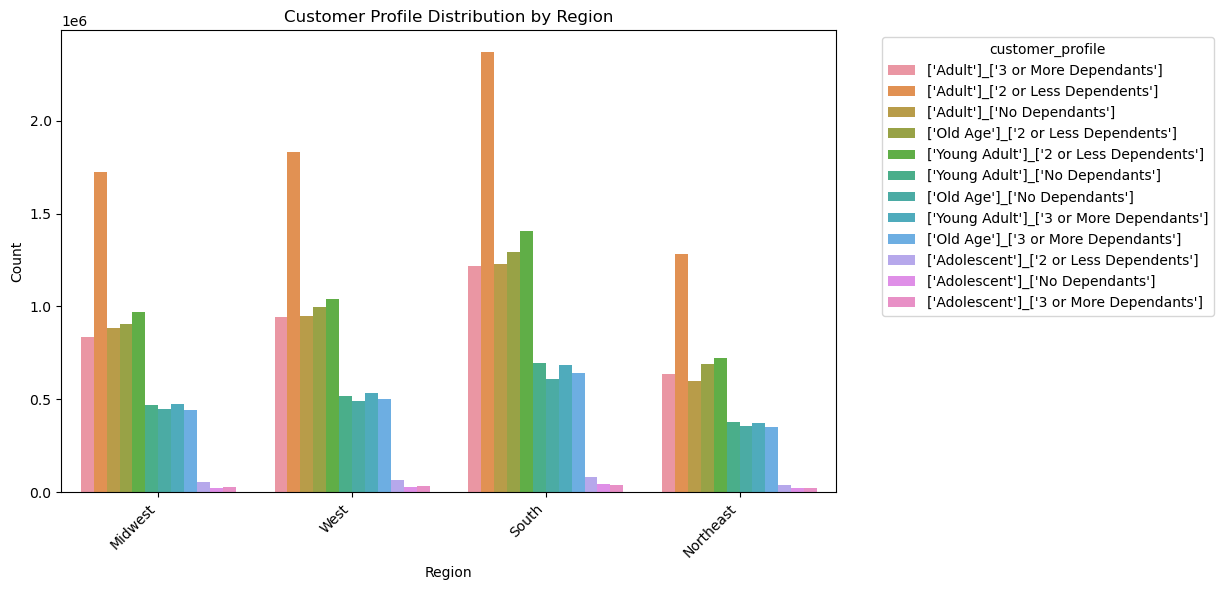

In [190]:
# Bar charts that show customer profile distributions by region

plt.figure(figsize = (10, 6))
barplot11 = sns.countplot(data = df_filtered, x = 'Region', hue = 'customer_profile')

plt.title('Customer Profile Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='customer_profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

All regions have more Adults with 2 or less dependents but South have more than other regions

In [191]:
# Export the bar chart Distribution of Customer Profile by Region

barplot11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customer Profile by Region.png'))

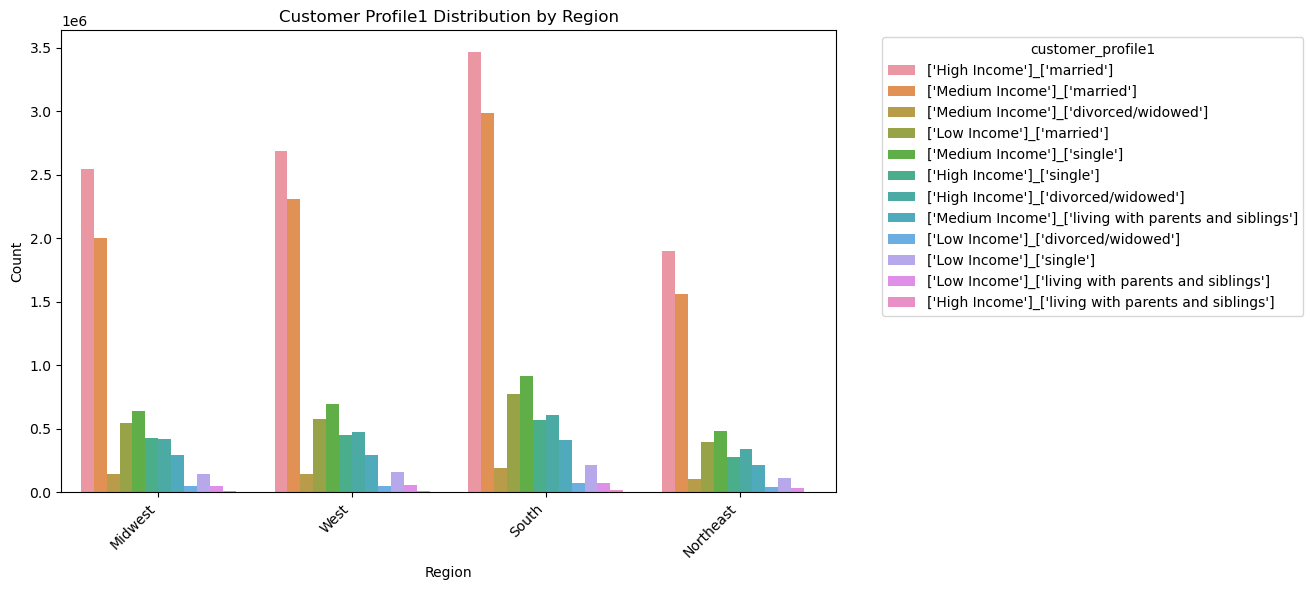

In [192]:
# Bar charts that show customer profile1 distributions by region

plt.figure(figsize = (10, 6))
barplot12 = sns.countplot(data = df_filtered, x = 'Region', hue = 'customer_profile1')

plt.title('Customer Profile1 Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='customer_profile1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### High Income and Medium Income married people make most of Instacart's customers. South particularly has more customers in that category

In [193]:
# Export the bar chart Distribution of Customer Profile1 by Region

barplot12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Customer Profile1 by Region.png'))

In [194]:
df_filtered.head()

,user_id,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,product_id,product_name,...,median_days_between_orders,order_frequency,Region,activity,Age_Category,Income_Category,Dependants_Category,customer_profile,customer_profile1,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,19.0,Regular customer,Midwest,NaN,Adult,High Income,3 or More Dependants,['Adult']_['3 or More Dependants'],['High Income']_['married'],produce


# Export Dataframe df_Final

In [195]:
df_filtered.to_pickle(os.path.join(path, '02 Data/Prepared Data/df_final.pkl'))